In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df_X = df.drop("Outcome", axis= 1)

In [12]:
df_X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [13]:
for col in df_X.columns:
    print(f"Column {col} , Missing Zeros is : {len(df_X.loc[df_X[col] == 0])}")

Column Pregnancies , Missing Zeros is : 111
Column Glucose , Missing Zeros is : 5
Column BloodPressure , Missing Zeros is : 35
Column SkinThickness , Missing Zeros is : 227
Column Insulin , Missing Zeros is : 374
Column BMI , Missing Zeros is : 11
Column DiabetesPedigreeFunction , Missing Zeros is : 0
Column Age , Missing Zeros is : 0


In [14]:
fill_zero_value = SimpleImputer(missing_values= 0, strategy= "mean", copy= False)

df_clean = pd.DataFrame(fill_zero_value.fit_transform(df_X), columns = df_X.columns)

In [15]:
for col in df_clean.columns:
    print(f"Column {col} , Missing Zeros is : {len(df_clean.loc[df_clean[col] == 0])}")

Column Pregnancies , Missing Zeros is : 0
Column Glucose , Missing Zeros is : 0
Column BloodPressure , Missing Zeros is : 0
Column SkinThickness , Missing Zeros is : 0
Column Insulin , Missing Zeros is : 0
Column BMI , Missing Zeros is : 0
Column DiabetesPedigreeFunction , Missing Zeros is : 0
Column Age , Missing Zeros is : 0


In [16]:
X = df_X
y = df["Outcome"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 75)

*Function for Evaluation*

In [18]:
def Evaluation(model, X_train, X_test, y_train, y_test):
    
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("Traning Result: \n===============================")
    
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict= True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.2f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("Testing Result: \n===============================")
    
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict= True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.2f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

**RandomForest Classifier**

In [19]:
rfc_clf = RandomForestClassifier(n_estimators= 1200, random_state= 75)

In [20]:
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1200, random_state=75)

In [21]:
Evaluation(rfc_clf, X_train, X_test, y_train, y_test)

Traning Result: 
CONFUSION MATRIX:
[[377   0]
 [  0 199]]
ACCURACY SCORE:
1.00
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    377.0  199.0       1.0      576.0         576.0
Testing Result: 
CONFUSION MATRIX:
[[112  11]
 [ 35  34]]
ACCURACY SCORE:
0.76
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.761905   0.755556  0.760417    0.758730      0.759623
recall       0.910569   0.492754  0.760417    0.701661      0.760417
f1-score     0.829630   0.596491  0.760417    0.713060      0.745846
support    123.000000  69.000000  0.760417  192.000000    192.000000


**Bagging Classifier**

In [22]:
dt = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator= dt, n_estimators= 15, random_state= 75)

In [23]:
bagging_clf.fit(X_train, y_train)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15,
                  random_state=75)

In [24]:
bagging_scores = {
                  "Train": accuracy_score(y_train, bagging_clf.predict(X_train)),
                  "Test": accuracy_score(y_test, bagging_clf.predict(X_test))
                 }

scores = {"Bagging Classifier": {
                                 "Train": accuracy_score(y_train, bagging_clf.predict(X_train)),
                                 "Test": accuracy_score(y_test, bagging_clf.predict(X_test))
                                }
         }

scores["Random Forest"] = {
                           "Train": accuracy_score(y_train, rfc_clf.predict(X_train)),
                           "Test": accuracy_score(y_test, rfc_clf.predict(X_test))
                          }

**AdaBoost Classifier**

In [25]:
adaboost = AdaBoostClassifier(n_estimators= 45)

In [26]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=45)

In [27]:
Evaluation(adaboost, X_train, X_test, y_train, y_test)

Traning Result: 
CONFUSION MATRIX:
[[331  46]
 [ 53 146]]
ACCURACY SCORE:
0.83
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.861979    0.760417  0.828125    0.811198      0.826891
recall       0.877984    0.733668  0.828125    0.805826      0.828125
f1-score     0.869908    0.746803  0.828125    0.808356      0.827377
support    377.000000  199.000000  0.828125  576.000000    576.000000
Testing Result: 
CONFUSION MATRIX:
[[106  17]
 [ 30  39]]
ACCURACY SCORE:
0.76
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.779412   0.696429  0.755208    0.737920      0.749590
recall       0.861789   0.565217  0.755208    0.713503      0.755208
f1-score     0.818533   0.624000  0.755208    0.721266      0.748623
support    123.000000  69.000000  0.755208  192.000000    192.000000


In [28]:
scores["AdaBoost"] = {
                      "Train": accuracy_score(y_train, adaboost.predict(X_train)),
                      "Test": accuracy_score(y_test, adaboost.predict(X_test)),
                     }

**GradientBoosting Classifier**

In [29]:
g_boost = GradientBoostingClassifier(n_estimators= 50, random_state= 75)

In [30]:
g_boost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=75)

In [31]:
Evaluation(g_boost, X_train, X_test, y_train, y_test)

Traning Result: 
CONFUSION MATRIX:
[[361  16]
 [ 49 150]]
ACCURACY SCORE:
0.89
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.880488    0.903614  0.887153    0.892051      0.888478
recall       0.957560    0.753769  0.887153    0.855664      0.887153
f1-score     0.917408    0.821918  0.887153    0.869663      0.884417
support    377.000000  199.000000  0.887153  576.000000    576.000000
Testing Result: 
CONFUSION MATRIX:
[[110  13]
 [ 32  37]]
ACCURACY SCORE:
0.77
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.774648   0.740000  0.765625    0.757324      0.762196
recall       0.894309   0.536232  0.765625    0.715270      0.765625
f1-score     0.830189   0.621849  0.765625    0.726019      0.755317
support    123.000000  69.000000  0.765625  192.000000    192.000000


In [32]:
scores["Gradient Boosting"] = {
                               "Train": accuracy_score(y_train, g_boost.predict(X_train)),
                               "Test": accuracy_score(y_test, g_boost.predict(X_test)),
                              }

**Voting Classifier**

In [33]:
log = LogisticRegression(solver= "liblinear")
svm = SVC(gamma= "scale")

estimators = [("Logistic Regression", log), ("Decision Tree", dt), ("SVM", svm)]
voting = VotingClassifier(estimators= estimators)

In [34]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(solver='liblinear')),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('SVM', SVC())])

In [35]:
Evaluation(voting, X_train, X_test, y_train, y_test)

Traning Result: 
CONFUSION MATRIX:
[[352  25]
 [ 84 115]]
ACCURACY SCORE:
0.81
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.807339    0.821429  0.810764    0.814384      0.812207
recall       0.933687    0.577889  0.810764    0.755788      0.810764
f1-score     0.865929    0.678466  0.810764    0.772197      0.801163
support    377.000000  199.000000  0.810764  576.000000    576.000000
Testing Result: 
CONFUSION MATRIX:
[[115   8]
 [ 34  35]]
ACCURACY SCORE:
0.78
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.771812   0.813953   0.78125    0.792883      0.786957
recall       0.934959   0.507246   0.78125    0.721103      0.781250
f1-score     0.845588   0.625000   0.78125    0.735294      0.766314
support    123.000000  69.000000   0.78125  192.000000    192.000000


In [36]:
scores["Voting"] = {
                    "Train": accuracy_score(y_train, voting.predict(X_train)),
                    "Test": accuracy_score(y_test, voting.predict(X_test)),
                   }

In [37]:
pd.DataFrame(scores)

,Bagging Classifier,Random Forest,AdaBoost,Gradient Boosting,Voting
Train,0.993056,1.000000,0.828125,0.887153,0.810764
Test,0.734375,0.760417,0.755208,0.765625,0.781250


<Axes: >

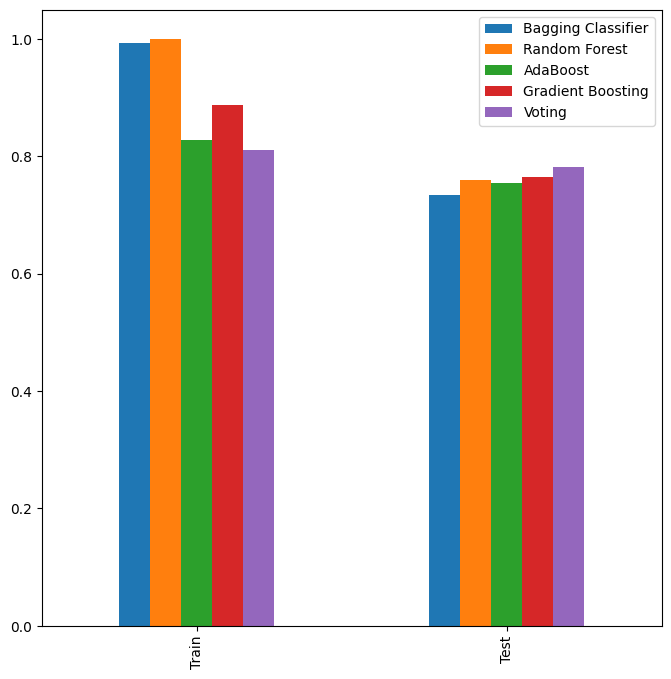

In [38]:
scores_df = pd.DataFrame(scores)
scores_df.plot(kind= "bar", figsize= (8, 8))